In [86]:
import pandas as pd

# Limpieza de datos
import re
from nltk.corpus import stopwords
from pattern.text.en import singularize, lemma
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unificando data

In [71]:
data1 = pd.read_csv(r"C:\Users\andre\Documents\Trabajo\LAB02-SDS\completeSpamAssassin.csv", usecols=lambda x: 'Unnamed' not in x)
data1.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [72]:
data2 = pd.read_csv(r"C:\Users\andre\Documents\Trabajo\LAB02-SDS\enronSpamSubset.csv", usecols=lambda x: 'Unnamed' not in x)
data2.head()

,Body,Label
0,Subject: stock promo mover : cwtd\n * * * urge...,1
1,Subject: are you listed in major search engine...,1
2,"Subject: important information thu , 30 jun 20...",1
3,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,"Subject: "" bidstogo "" is places to go , things...",1


In [73]:
data = pd.concat([data1, data2])
data.head()

,Body,Label
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


In [74]:
print(len(data1))
print(len(data2))
print(len(data))

6046
10000
16046


In [75]:
data = data.dropna()

# Limpiando data

In [76]:
cachedStopWords = stopwords.words('english')
def removeStepWords(value):
  return ' '.join([word for word in value.split() if word not in cachedStopWords])

data["Body"] = data["Body"].apply(removeStepWords)

In [77]:
def parseLemma(value):
  try:
    return lemma(value)
  except:
    return value

def sentenceToPresent(value):
  items = value.split(' ')
  for item in items:
    present = parseLemma(item)
    value = value.replace(item, present)
  return value

data["Body"] = data["Body"].apply(sentenceToPresent)

In [78]:
def toSingular(value):
  try:
    return singularize(value)
  except:
    return value
    
def sentenceToSingular(value):
  items = value.split(' ')
  for item in items:
    singular = toSingular(item)
    value = value.replace(item, singular)
  return value

data["Body"] = data["Body"].apply(sentenceToSingular)

In [79]:
def removeSpecialChars(value):
    ayuda = re.sub(r"[^a-zA-Z ]",' ', value.lower())
    return ayuda

data["Body"] = data["Body"].apply(removeSpecialChars)

In [80]:
def removeExtraSpaces(value):
    return re.sub('  +', ' ', value) 

data["Body"] = data["Body"].apply(removeExtraSpaces)

In [81]:
def removeLinks(value):
  if ('http' not in value): return value
  links = re.findall(r"http[^\s]*", value, re.I)
  for link in links:
    value = value.replace(link, '')
  return value

data["Body"] = data["Body"].apply(removeExtraSpaces)

In [82]:
data.drop(data[data["Body"] == "empty"].index, inplace=True)

In [83]:
data.head()

,Body,Label
0,save life insurance why spend more than you ha...,1
1,fight the risk cancer http www adclick ws p c...,1
2,fight the risk cancer http www adclick ws p c...,1
3,adult club offer free membership instant acce...,1
4,i think might like these slim down guarantee l...,1


# Wordcloud

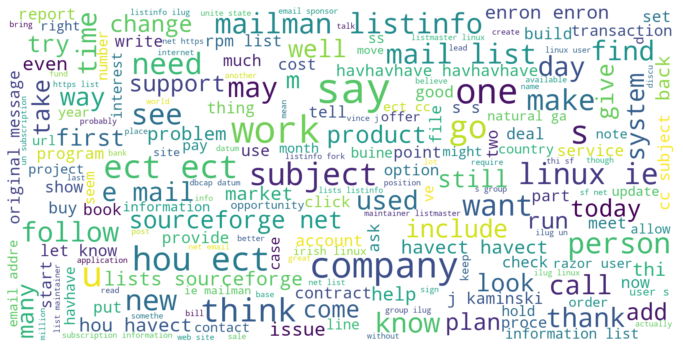

In [87]:
# wordcloud 
body_strings = data["Body"].to_list()
body_strings = pd.Series(body_strings).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=100, background_color='white').generate(body_strings)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()